In [1]:
import pandas as pd

In [2]:
original_data = pd.read_csv('noon-laptops.csv')
original_data.head()

,name,brand,model,price,stock,Operating System Version,Display Resolution Type,Processor Speed,Operating System,RAM Size,...,Product Height,Product Width/Depth,Features,Pixels Per Inch,Graphic Memory,Adobe Flash Compatible,HDD Rotation,Operating System Number,Style,Number of Channels
0,15s-fq4047ne Laptop With 15.6-inch Display Cor...,HP,15s-fq4047ne,EGP 19999.00 (Inclusive of VAT),NaN,Windows 11 Home,Full HD,4.5 GHz,Windows,8 GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Modern 14 B11M Laptop With 14-Inch Display, Co...",MSI,9S7-14D214-404 / 9S7-14D224-802,EGP 22999.00 Inclusive of VAT,NaN,Windows 11,Full HD,2.8 GHz,Windows,8 GB,...,21.9 cm,1.69 cm,"Business, Intel, Travel, Personal, USB",157,NaN,NaN,NaN,NaN,NaN,NaN
2,15s-eq1001ne with 15.6 inch AMD Ryzen 3-3250U ...,HP,15s-eq1001ne,EGP 11999.00 (Inclusive of VAT),NaN,Windows 11,HD,2.6 GHz,Windows,4 GB,...,NaN,NaN,NaN,NaN,None None,NaN,NaN,NaN,NaN,NaN
3,IdeaPad Gaming 3 Laptop With 15.6-inch Display...,Lenovo,82S900YSED,EGP 45600.00 (Inclusive of VAT),NaN,Windows 11,Full HD,2.3 GHz,Windows,16 GB,...,NaN,NaN,NaN,NaN,4 GB,NaN,NaN,NaN,NaN,NaN
4,15-eh3000ne Laptop With 15.6 inch AMD Ryzen 7-...,HP,15-eh3000ne,EGP 23999.00 (Inclusive of VAT),NaN,Windows 11 Home,Full HD,4.5 GHz,Windows,16 GB,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
original_data.shape

(300, 62)

In [4]:
original_data.columns

Index(['name', 'brand', 'model', 'price', 'stock', 'Operating System Version',
       'Display Resolution Type', 'Processor Speed', 'Operating System',
       'RAM Size', 'Storage Type', 'Internal Memory', 'Graphics Memory Name',
       'Screen Size', 'Display Resolution', 'Colour Name', 'Processor Type',
       'Laptop Type', 'Processor Version Number/Generation',
       'Graphics Memory Version', 'Number of Cores', 'RAM Type',
       'Processor Brand', 'External Graphics', 'Keyboard Language',
       'Model Number', 'Model Name', 'HDMI Output', 'Number of USB Ports',
       'SD Card Slot', 'Number of HDMI Ports', 'Processor Version', 'link',
       'SIM Type', 'Connection Type', 'Laptop Weight', 'Battery Size',
       'Product Weight', 'Display Type', 'Version',
       'Primary Camera Resolution', 'What's In The Box', 'Camera Type',
       'Wireless', 'Audio Jack', 'Battery Type', 'Screen Features',
       'Refresh Rates', 'Monitor response time', 'Usage Type',
       'Average Batter

In [5]:
# to calculate percentage of missing values in each variable

percent_missing = original_data.isnull().sum() * 100 / len(original_data)

missing_value = pd.DataFrame({'percent_missing': percent_missing})

missing_value.sort_values('percent_missing', ascending=False , inplace=True)

missing_value


,percent_missing
stock,100.0
Number of Channels,98.0
Style,92.0
HDD Rotation,90.0
SIM Type,88.0
...,...
RAM Type,0.0
Processor Brand,0.0
Model Number,0.0
Number of USB Ports,0.0


In [6]:
# looks like we have some variables that are mostly null, hence, we will drop them

columns_to_drop = percent_missing[percent_missing >= 30].index

clean_data = original_data.drop(columns=columns_to_drop) # create another df with the variables that have less than 30% of missing values

In [7]:
print('clean_data has', clean_data.shape[0] ,'rows & ' ,  clean_data.shape[1], 'columns' )

print('original_data has', original_data.shape[0] ,'rows & ' ,  original_data.shape[1], 'columns' )

# we can see that 32 variables have been dropped

clean_data has 300 rows &  30 columns
original_data has 300 rows &  62 columns


In [8]:
clean_data.columns

Index(['name', 'brand', 'model', 'price', 'Operating System Version',
       'Display Resolution Type', 'Processor Speed', 'Operating System',
       'RAM Size', 'Storage Type', 'Internal Memory', 'Screen Size',
       'Display Resolution', 'Colour Name', 'Processor Type', 'Laptop Type',
       'Processor Version Number/Generation', 'Number of Cores', 'RAM Type',
       'Processor Brand', 'External Graphics', 'Keyboard Language',
       'Model Number', 'Model Name', 'HDMI Output', 'Number of USB Ports',
       'SD Card Slot', 'Number of HDMI Ports', 'Processor Version', 'link'],
      dtype='object')

In [9]:
pd.options.display.max_columns = None # to display all columns

clean_data.head()

,name,brand,model,price,Operating System Version,Display Resolution Type,Processor Speed,Operating System,RAM Size,Storage Type,Internal Memory,Screen Size,Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,Keyboard Language,Model Number,Model Name,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version,link
0,15s-fq4047ne Laptop With 15.6-inch Display Cor...,HP,15s-fq4047ne,EGP 19999.00 (Inclusive of VAT),Windows 11 Home,Full HD,4.5 GHz,Windows,8 GB,SSD,512 GB,15.6 in,1080x1920,Silver,Core i5,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,English/Arabic,15s-fq4047ne,15s-fq4047ne / 8G1A5EA,Yes,3,no,1.0,Core i5-1155G7,https://www.noon.com/egypt-en/15s-fq4047ne-lap...
1,"Modern 14 B11M Laptop With 14-Inch Display, Co...",MSI,9S7-14D214-404 / 9S7-14D224-802,EGP 22999.00 Inclusive of VAT,Windows 11,Full HD,2.8 GHz,Windows,8 GB,SSD,512 GB,14 in,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,English,9S7-14D214-404 / 9S7-14D224-802,Modern 14 B11M,Yes,3,Yes,1.0,Core i7,https://www.noon.com/egypt-en/modern-14-b11m-l...
2,15s-eq1001ne with 15.6 inch AMD Ryzen 3-3250U ...,HP,15s-eq1001ne,EGP 11999.00 (Inclusive of VAT),Windows 11,HD,2.6 GHz,Windows,4 GB,SSD,256 GB,15.6 in,1366x768,Black,Ryzen 3,Notebook,3rd Gen,Octa Core,DDR4,AMD,Graphic Card,English/Arabic,15s-eq1001ne,15s-eq1001ne / 155N7EA,1,3,1,1.0,Ryzen 3 3250U,https://www.noon.com/egypt-en/15s-eq1001ne-wit...
3,IdeaPad Gaming 3 Laptop With 15.6-inch Display...,Lenovo,82S900YSED,EGP 45600.00 (Inclusive of VAT),Windows 11,Full HD,2.3 GHz,Windows,16 GB,SSD,512 GB,15.6 in,1920x1080,Grey,Core i7,Notebook,12th Gen,10-Core,DDR4,Intel,Graphic Card,English/Arabic,82S900YSED,Idea Pad Gaming 3 15IAH7,1,3,no,1.0,i7-12650H,https://www.noon.com/egypt-en/ideapad-gaming-3...
4,15-eh3000ne Laptop With 15.6 inch AMD Ryzen 7-...,HP,15-eh3000ne,EGP 23999.00 (Inclusive of VAT),Windows 11 Home,Full HD,4.5 GHz,Windows,16 GB,SSD,512 GB,15.6 in,1080x1920,Silver,Ryzen 7,Notebook,7th Gen,Octa Core,DDR4,AMD,Integrated,English/Arabic,15-eh3000ne,15-eh3000ne /822S5EA,Yes,3,no,1.0,Ryzen 7 7730U,https://www.noon.com/egypt-en/15-eh3000ne-lapt...


In [10]:
clean_data = clean_data.drop(columns = ['name' , 'link' , 'model' , 'Model Number' ,'Model Name', 'Keyboard Language' ])    #drop unnecessary variables

In [11]:
clean_data.head()

#seems like price , ram size & internal memory need modifications to only extract the digits

,brand,price,Operating System Version,Display Resolution Type,Processor Speed,Operating System,RAM Size,Storage Type,Internal Memory,Screen Size,Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
0,HP,EGP 19999.00 (Inclusive of VAT),Windows 11 Home,Full HD,4.5 GHz,Windows,8 GB,SSD,512 GB,15.6 in,1080x1920,Silver,Core i5,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,no,1.0,Core i5-1155G7
1,MSI,EGP 22999.00 Inclusive of VAT,Windows 11,Full HD,2.8 GHz,Windows,8 GB,SSD,512 GB,14 in,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7
2,HP,EGP 11999.00 (Inclusive of VAT),Windows 11,HD,2.6 GHz,Windows,4 GB,SSD,256 GB,15.6 in,1366x768,Black,Ryzen 3,Notebook,3rd Gen,Octa Core,DDR4,AMD,Graphic Card,1,3,1,1.0,Ryzen 3 3250U
3,Lenovo,EGP 45600.00 (Inclusive of VAT),Windows 11,Full HD,2.3 GHz,Windows,16 GB,SSD,512 GB,15.6 in,1920x1080,Grey,Core i7,Notebook,12th Gen,10-Core,DDR4,Intel,Graphic Card,1,3,no,1.0,i7-12650H
4,HP,EGP 23999.00 (Inclusive of VAT),Windows 11 Home,Full HD,4.5 GHz,Windows,16 GB,SSD,512 GB,15.6 in,1080x1920,Silver,Ryzen 7,Notebook,7th Gen,Octa Core,DDR4,AMD,Integrated,Yes,3,no,1.0,Ryzen 7 7730U


In [12]:
clean_data['price'].value_counts()

price
EGP 9999.00 (Inclusive of VAT)      18
EGP 11999.00 (Inclusive of VAT)     18
EGP 23999.00 (Inclusive of VAT)     18
EGP 48500.00 (Inclusive of VAT)      6
EGP 23600.00 (Inclusive of VAT)      6
EGP 58000.00 (Inclusive of VAT)      6
EGP 98950.00 (Inclusive of VAT)      6
EGP 80000.00 (Inclusive of VAT)      6
EGP 26999.00 Inclusive of VAT        6
EGP 55399.00 Inclusive of VAT        6
EGP 38934.00 (Inclusive of VAT)      6
EGP 10500.00 (Inclusive of VAT)      6
EGP 21999.00 Inclusive of VAT        6
EGP 39999.00 (Inclusive of VAT)      6
EGP 22999.00 Inclusive of VAT        6
EGP 19464.00 (Inclusive of VAT)      6
EGP 37749.00 Inclusive of VAT        6
EGP 25899.00 Inclusive of VAT        6
EGP 12000.00 (Inclusive of VAT)      6
EGP 23499.00 (Inclusive of VAT)      6
EGP 49900.00 (Inclusive of VAT)      6
EGP 20490.00 Inclusive of VAT        6
EGP 65999.00 (Inclusive of VAT)      6
EGP 19999.00 (Inclusive of VAT)      6
EGP 60999.00 Inclusive of VAT        6
EGP 70000.00 (Inclu

In [13]:
clean_data['RAM Size'].value_counts() # they are all in GB's, we will only extract the digits then

RAM Size
8 GB     150
16 GB     78
4 GB      72
Name: count, dtype: int64

In [14]:
clean_data['Processor Speed'].value_counts()  # they are all in GHz , we will only extract the digits 

Processor Speed
4.7 GHz    54
4.5 GHz    24
1.1 GHz    24
2.8 GHz    18
3.2 GHz    18
2.6 GHz    12
3.5 GHz    12
1.2 GHz    12
4.4 GHz    12
4.2 GHz    12
2.1 GHz    12
2.4 GHz    12
1.7 GHz    12
3.6 GHz     6
3 GHz       6
2 GHz       6
4.3 GHz     6
1 GHz       6
4.6 GHz     6
4.1 GHz     6
2.3 GHz     6
1.8 GHz     6
Name: count, dtype: int64

In [15]:
clean_data['Internal Memory'].value_counts()

Internal Memory
512 GB    150
256 GB     90
1 TB       42
500 GB     12
128 GB      6
Name: count, dtype: int64

In [16]:
clean_data['Processor Version Number/Generation'].value_counts()  # we need to unifiy the formats for these values like '12' need to be '12th Gen' & '5 th gen'

Processor Version Number/Generation
12th Gen                                                                                                      48
11th Gen                                                                                                      42
Not Applicable                                                                                                36
10th Gen                                                                                                      24
13th Gen                                                                                                      18
Celeron N4020                                                                                                 12
6300U                                                                                                          6
Intel Core i3-1215U (up to 4.4GHz)                                                                             6
1135G7                                                      

In [17]:
clean_data[clean_data['Processor Version Number/Generation'] == 'Not Applicable' ] # sounds like all the not applicable are apple laptops

,brand,price,Operating System Version,Display Resolution Type,Processor Speed,Operating System,RAM Size,Storage Type,Internal Memory,Screen Size,Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
16,Apple,EGP 130000.00 (Inclusive of VAT),OS X,Full HD,2.1 GHz,macOS,16 GB,SSD,512 GB,14 in,1366x768,Space Grey,Apple M2 Pro,Notebook,Not Applicable,10-Core,DDR5,Apple,Integrated,yes,3,yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
21,Apple,EGP 65500.00 (Inclusive of VAT),OS X,Full HD,3.2 GHz,macOS,8 GB,SSD,256 GB,13.6 in,1920x1080,Space Grey,Apple M2,Notebook,Not Applicable,16-Core,DDR4,Apple,Integrated,no,2,no,1.0,Apple M2 chip with 8-core CPU and 8-core GPU
25,Apple,EGP 70000.00 (Inclusive of VAT),OS X,Full HD,3.2 GHz,macOS,8 GB,SSD,256 GB,13.6 in,1920x1080,Midnight,Apple M2,Notebook,Not Applicable,16-Core,DDR4,Apple,Integrated,no,2,no,2.0,Apple M2 chip with 8-core CPU and 8-core GPU
31,Apple,EGP 98950.00 (Inclusive of VAT),OS X,QHD,2 GHz,macOS,16 GB,SSD,512 GB,14 in,3024x1964,Space Grey,Apple M1 Pro,Notebook,Not Applicable,Octa Core,DDR4,Apple,Integrated,Yes,3,Yes,1.0,Apple M1 Pro chip With 8‑core CPU And 14‑core GPU
32,Apple,EGP 80000.00 (Inclusive of VAT),OS X,Full HD,1.7 GHz,macOS,8 GB,SSD,256 GB,13 in,1920x1080,Space Grey,Apple M2,Notebook,Not Applicable,16-Core,DDR4,Apple,Integrated,no,2,no,2.0,Apple M2 chip with 8-core CPU and 10-core GPU
47,Apple,EGP 49900.00 (Inclusive of VAT),OS X,Full HD,3.2 GHz,macOS,8 GB,SSD,256 GB,13 in,1920x1080,Gold,Apple M1,Notebook,Not Applicable,Quad Core,DDR4,Apple,Integrated,Yes,2,NaN,1.0,Apple M1
66,Apple,EGP 130000.00 (Inclusive of VAT),OS X,Full HD,2.1 GHz,macOS,16 GB,SSD,512 GB,14 in,1366x768,Space Grey,Apple M2 Pro,Notebook,Not Applicable,10-Core,DDR5,Apple,Integrated,yes,3,yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
71,Apple,EGP 65500.00 (Inclusive of VAT),OS X,Full HD,3.2 GHz,macOS,8 GB,SSD,256 GB,13.6 in,1920x1080,Space Grey,Apple M2,Notebook,Not Applicable,16-Core,DDR4,Apple,Integrated,no,2,no,1.0,Apple M2 chip with 8-core CPU and 8-core GPU
75,Apple,EGP 70000.00 (Inclusive of VAT),OS X,Full HD,3.2 GHz,macOS,8 GB,SSD,256 GB,13.6 in,1920x1080,Midnight,Apple M2,Notebook,Not Applicable,16-Core,DDR4,Apple,Integrated,no,2,no,2.0,Apple M2 chip with 8-core CPU and 8-core GPU
81,Apple,EGP 98950.00 (Inclusive of VAT),OS X,QHD,2 GHz,macOS,16 GB,SSD,512 GB,14 in,3024x1964,Space Grey,Apple M1 Pro,Notebook,Not Applicable,Octa Core,DDR4,Apple,Integrated,Yes,3,Yes,1.0,Apple M1 Pro chip With 8‑core CPU And 14‑core GPU


In [18]:
clean_data['HDMI Output'].value_counts() # we need to modifiy these values to have 'Yes' & 'No'

HDMI Output
1                           114
Yes                         108
no                           18
yes                          12
USB                           6
HDMI                          6
2.0                           6
HDMI - USB 2.0 - USB 3.2      6
1xHDMI 1.4                    6
Name: count, dtype: int64

In [19]:
clean_data['Screen Size'].value_counts()  # all of the the values are in inches(in) while only 6 laptops are in cm which seems like an input error, will extract the digits from the values 

Screen Size
15.6 in    216
14 in       30
13.6 in     12
13 in       12
11.6 in     12
15.6 cm      6
12.4 in      6
13.3 in      6
Name: count, dtype: int64

In [20]:
clean_data['Number of USB Ports'].value_counts()

Number of USB Ports
3    204
2     42
4     36
1     12
5      6
Name: count, dtype: int64

In [21]:
clean_data['SD Card Slot'].value_counts() # we need to unifiy the formats, making them into Yes or No

SD Card Slot
Yes        72
1          72
no         60
0          24
NO         18
yes        18
YES         6
1xDC-in     6
Name: count, dtype: int64

In [22]:
clean_data['Number of HDMI Ports'].value_counts()

Number of HDMI Ports
1.0    204
2.0     12
Name: count, dtype: int64

In [23]:
clean_data.info()

# we have wrong data type for some variables like price, Processor Speed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   brand                                300 non-null    object 
 1   price                                300 non-null    object 
 2   Operating System Version             300 non-null    object 
 3   Display Resolution Type              228 non-null    object 
 4   Processor Speed                      288 non-null    object 
 5   Operating System                     300 non-null    object 
 6   RAM Size                             300 non-null    object 
 7   Storage Type                         300 non-null    object 
 8   Internal Memory                      300 non-null    object 
 9   Screen Size                          300 non-null    object 
 10  Display Resolution                   288 non-null    object 
 11  Colour Name                     

In [24]:
clean_data['price'] = clean_data['price'].str.extract(r'(\d+)').astype(int) # to extract the digits from 'price' col while changing its type to float
clean_data['RAM Size'] = clean_data['RAM Size'].str.extract(r'(\d+)').astype(int)
clean_data['Processor Speed'] = clean_data['Processor Speed'].str.extract(r'(\d+\.\d+)').astype(float)
clean_data['Screen Size'] = clean_data['Screen Size'].str.extract(r'(\d+\.\d+)').astype(float)

In [25]:
clean_data.head()

,brand,price,Operating System Version,Display Resolution Type,Processor Speed,Operating System,RAM Size,Storage Type,Internal Memory,Screen Size,Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
0,HP,19999,Windows 11 Home,Full HD,4.5,Windows,8,SSD,512 GB,15.6,1080x1920,Silver,Core i5,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,no,1.0,Core i5-1155G7
1,MSI,22999,Windows 11,Full HD,2.8,Windows,8,SSD,512 GB,NaN,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7
2,HP,11999,Windows 11,HD,2.6,Windows,4,SSD,256 GB,15.6,1366x768,Black,Ryzen 3,Notebook,3rd Gen,Octa Core,DDR4,AMD,Graphic Card,1,3,1,1.0,Ryzen 3 3250U
3,Lenovo,45600,Windows 11,Full HD,2.3,Windows,16,SSD,512 GB,15.6,1920x1080,Grey,Core i7,Notebook,12th Gen,10-Core,DDR4,Intel,Graphic Card,1,3,no,1.0,i7-12650H
4,HP,23999,Windows 11 Home,Full HD,4.5,Windows,16,SSD,512 GB,15.6,1080x1920,Silver,Ryzen 7,Notebook,7th Gen,Octa Core,DDR4,AMD,Integrated,Yes,3,no,1.0,Ryzen 7 7730U


In [26]:
clean_data = clean_data.rename(columns={"price": "Price(EGP)" ,  "Processor Speed": "Processor Speed(GHZ)" , 
                                      'RAM Size':'RAM Size(GB)' ,  'Screen Size':'Screen Size(inch)'})

In [27]:
# unifiying formats for Processor Version Number/Generation

clean_data['Processor Version Number/Generation'] = clean_data['Processor Version Number/Generation'].replace({'5 th gen':'5th Gen' , '12':'12th Gen' ,
                                                                                                           'Intel Core i3-1215U (up to 4.4GHz)':'12th Gen',
                                                                                                           'Core i7-1255U':'12th Gen',
                                                                                                           'i7-1255U':'12th Gen',
                                                                                                           '1135G7':'11th Gen' ,
                                                                                                           '1115G4':'11th Gen',
                                                                                                           'Intel Core I5-1135G7':'11th Gen',
                                                                                                           'Intel Core i7-1165G7 (up to 4.7 GHz with Intel Turbo Boost Technology, 12 MB L3 cache, 4 cores, 8 threads)':'11th Gen',
                                                                                                           'Celeron N4020':'9th Gen', '6300U':'6th Gen',
                                                                                                          'i7-13620H':'13th Gen',
                                                                                                          'Not Applicable' : 'Apple laptop'}).astype(object)

In [28]:
clean_data['SD Card Slot'] = clean_data['SD Card Slot'].replace({'YES': 'Yes', 'yes':'Yes'   , '1':'Yes'  , '1xDC-in':'Yes' , '0':'No' , 'no':'No' , 'NO':'No'}).astype(object)
# replacing all values to either 'Yes' or 'No'

In [29]:
clean_data['HDMI Output'] = clean_data['HDMI Output'].replace({'1': 'Yes', 'yes':'Yes'   , 'HDMI':'Yes'  , 'USB':'Yes' , '0':'No' , 'no':'No',
                                                             '2.0':'Yes' ,'HDMI - USB 2.0 - USB 3.2':'Yes'  , '1xHDMI 1.4':'Yes'  }).astype(object)
# replacing all values to either 'Yes' or 'No'

In [30]:
clean_data['Number of HDMI Ports'] = clean_data['Number of HDMI Ports'].astype(object)

In [31]:
# imputing missing values 

percent_missing = clean_data.isnull().sum() * 100 / len(clean_data)

missing_value = pd.DataFrame({'percent_missing': percent_missing})

missing_value.sort_values('percent_missing', ascending=False , inplace=True)

missing_value

,percent_missing
Number of HDMI Ports,28.0
Processor Version,24.0
Display Resolution Type,24.0
Processor Type,20.0
Screen Size(inch),14.0
Processor Speed(GHZ),10.0
SD Card Slot,8.0
HDMI Output,6.0
External Graphics,4.0
Display Resolution,4.0


In [32]:
clean_data.isnull().sum()

brand                                   0
Price(EGP)                              0
Operating System Version                0
Display Resolution Type                72
Processor Speed(GHZ)                   30
Operating System                        0
RAM Size(GB)                            0
Storage Type                            0
Internal Memory                         0
Screen Size(inch)                      42
Display Resolution                     12
Colour Name                             0
Processor Type                         60
Laptop Type                             6
Processor Version Number/Generation     6
Number of Cores                         0
RAM Type                                0
Processor Brand                         0
External Graphics                      12
HDMI Output                            18
Number of USB Ports                     0
SD Card Slot                           24
Number of HDMI Ports                   84
Processor Version                 

In [33]:
columns_to_impute = ['Display Resolution Type','Number of HDMI Ports', 'Processor Version','Processor Type' ,'Screen Size(inch)' , 
                   'Processor Speed(GHZ)' , 'SD Card Slot' , 'HDMI Output' ,  'External Graphics' , 'Display Resolution' ,  'Laptop Type',
                    'Processor Version Number/Generation'] 

# impute missing values with the mode for each column
for col in columns_to_impute:
    clean_data[col].fillna(clean_data[col].mode()[0], inplace=True)



In [34]:
clean_data.isnull().sum()

brand                                  0
Price(EGP)                             0
Operating System Version               0
Display Resolution Type                0
Processor Speed(GHZ)                   0
Operating System                       0
RAM Size(GB)                           0
Storage Type                           0
Internal Memory                        0
Screen Size(inch)                      0
Display Resolution                     0
Colour Name                            0
Processor Type                         0
Laptop Type                            0
Processor Version Number/Generation    0
Number of Cores                        0
RAM Type                               0
Processor Brand                        0
External Graphics                      0
HDMI Output                            0
Number of USB Ports                    0
SD Card Slot                           0
Number of HDMI Ports                   0
Processor Version                      0
dtype: int64

# Descriptive measures

In [35]:
clean_data.groupby('brand')['Price(EGP)'].describe()

# seems like we have duplicates because the std is zero in Fujitsu , MSI & microsoft

,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
ASUS,24.0,18224.000000,8411.288998,9999.0,9999.0,17949.0,26174.0,26999.0
Acer,30.0,17650.733333,5739.515184,9499.0,10999.0,20490.0,21999.0,23600.0
Apple,36.0,82391.666667,26320.145733,49900.0,65500.0,75000.0,98950.0,130000.0
DELL,54.0,30931.555556,15991.893917,10500.0,19464.0,23499.0,38934.0,58000.0
Fujitsu,6.0,13999.000000,0.000000,13999.0,13999.0,13999.0,13999.0,13999.0
HP,60.0,20646.200000,8250.159712,11999.0,12000.0,20999.0,23999.0,39999.0
Lenovo,78.0,33232.179487,19723.145556,9999.0,12495.0,30999.0,48500.0,65999.0
MSI,6.0,22999.000000,0.000000,22999.0,22999.0,22999.0,22999.0,22999.0
Microsoft,6.0,28888.000000,0.000000,28888.0,28888.0,28888.0,28888.0,28888.0


In [36]:
selected_brands = ['MSI', 'Microsoft', 'Fujitsu']
filtered_data = clean_data[clean_data['brand'].isin(selected_brands)]  # to investigate the duplicates

filtered_data


,brand,Price(EGP),Operating System Version,Display Resolution Type,Processor Speed(GHZ),Operating System,RAM Size(GB),Storage Type,Internal Memory,Screen Size(inch),Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
1,MSI,22999,Windows 11,Full HD,2.8,Windows,8,SSD,512 GB,15.6,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7
19,Fujitsu,13999,Free DOS,Full HD,4.7,DOS,8,SSD,256 GB,15.6,1920x1080,black,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,4,Yes,1.0,Ryzen 3 3250U
24,Microsoft,28888,Free DOS,HD,4.7,DOS,16,SSD,256 GB,12.4,1080x1920,Platinum,Core i5,Notebook,10th Gen,Quad Core,LPDDR4,Intel,Integrated,Yes,1,Yes,1.0,Core i5-1035G1
51,MSI,22999,Windows 11,Full HD,2.8,Windows,8,SSD,512 GB,15.6,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7
69,Fujitsu,13999,Free DOS,Full HD,4.7,DOS,8,SSD,256 GB,15.6,1920x1080,black,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,4,Yes,1.0,Ryzen 3 3250U
74,Microsoft,28888,Free DOS,HD,4.7,DOS,16,SSD,256 GB,12.4,1080x1920,Platinum,Core i5,Notebook,10th Gen,Quad Core,LPDDR4,Intel,Integrated,Yes,1,Yes,1.0,Core i5-1035G1
101,MSI,22999,Windows 11,Full HD,2.8,Windows,8,SSD,512 GB,15.6,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7
119,Fujitsu,13999,Free DOS,Full HD,4.7,DOS,8,SSD,256 GB,15.6,1920x1080,black,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,4,Yes,1.0,Ryzen 3 3250U
124,Microsoft,28888,Free DOS,HD,4.7,DOS,16,SSD,256 GB,12.4,1080x1920,Platinum,Core i5,Notebook,10th Gen,Quad Core,LPDDR4,Intel,Integrated,Yes,1,Yes,1.0,Core i5-1035G1
151,MSI,22999,Windows 11,Full HD,2.8,Windows,8,SSD,512 GB,15.6,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7


In [37]:
filtered_data = filtered_data.drop_duplicates(subset='brand')

filtered_data


,brand,Price(EGP),Operating System Version,Display Resolution Type,Processor Speed(GHZ),Operating System,RAM Size(GB),Storage Type,Internal Memory,Screen Size(inch),Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
1,MSI,22999,Windows 11,Full HD,2.8,Windows,8,SSD,512 GB,15.6,1920x1080,Carbon Gray,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,Yes,1.0,Core i7
19,Fujitsu,13999,Free DOS,Full HD,4.7,DOS,8,SSD,256 GB,15.6,1920x1080,black,Core i7,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,4,Yes,1.0,Ryzen 3 3250U
24,Microsoft,28888,Free DOS,HD,4.7,DOS,16,SSD,256 GB,12.4,1080x1920,Platinum,Core i5,Notebook,10th Gen,Quad Core,LPDDR4,Intel,Integrated,Yes,1,Yes,1.0,Core i5-1035G1


In [38]:
brands_to_exclude = ['MSI', 'Microsoft', 'Fujitsu']

# remove observations that has either of the brands 'MSI', 'Apple', 'Microsoft'

clean_data = clean_data[~clean_data['brand'].isin(brands_to_exclude)]

In [39]:
clean_data['brand'].value_counts()

brand
Lenovo    78
HP        60
DELL      54
Apple     36
Acer      30
ASUS      24
Name: count, dtype: int64

In [40]:
# now we merge filtered_data and clean_data to have no duplicates 

merged_data = pd.concat([clean_data, filtered_data], ignore_index=True)


In [41]:
merged_data.describe()

,Price(EGP),Processor Speed(GHZ),RAM Size(GB),Screen Size(inch),Number of USB Ports,Number of HDMI Ports
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,33333.578947,3.388070,9.038596,15.287719,2.954386,1.042105
std,25475.881236,1.297668,4.407330,0.946057,0.661856,0.201183
min,9499.000000,1.100000,4.000000,11.600000,1.000000,1.000000
25%,15470.000000,2.300000,4.000000,15.600000,3.000000,1.000000
50%,23999.000000,3.600000,8.000000,15.600000,3.000000,1.000000
75%,48500.000000,4.700000,16.000000,15.600000,3.000000,1.000000
max,130000.000000,4.700000,16.000000,15.600000,5.000000,2.000000


In [42]:
merged_data.groupby('brand')['Price(EGP)'].describe()


,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
ASUS,24.0,18224.000000,8411.288998,9999.0,9999.0,17949.0,26174.0,26999.0
Acer,30.0,17650.733333,5739.515184,9499.0,10999.0,20490.0,21999.0,23600.0
Apple,36.0,82391.666667,26320.145733,49900.0,65500.0,75000.0,98950.0,130000.0
DELL,54.0,30931.555556,15991.893917,10500.0,19464.0,23499.0,38934.0,58000.0
Fujitsu,1.0,13999.000000,NaN,13999.0,13999.0,13999.0,13999.0,13999.0
HP,60.0,20646.200000,8250.159712,11999.0,12000.0,20999.0,23999.0,39999.0
Lenovo,78.0,33232.179487,19723.145556,9999.0,12495.0,30999.0,48500.0,65999.0
MSI,1.0,22999.000000,NaN,22999.0,22999.0,22999.0,22999.0,22999.0
Microsoft,1.0,28888.000000,NaN,28888.0,28888.0,28888.0,28888.0,28888.0


In [43]:
from scipy.stats import iqr

# group by brand and calculate IQR for 'Price(EGP)'
grouped_iqr = merged_data.groupby('brand')['Price(EGP)'].agg(iqr)

iqr_df = pd.DataFrame({'Brand': grouped_iqr.index, 'IQR': grouped_iqr.values}) # put result in a df

iqr_df

,Brand,IQR
0,ASUS,16175.0
1,Acer,11000.0
2,Apple,33450.0
3,DELL,19470.0
4,Fujitsu,0.0
5,HP,11999.0
6,Lenovo,36005.0
7,MSI,0.0
8,Microsoft,0.0


In [44]:
merged_data[merged_data['Price(EGP)'] == 130000]  # to investigate this value

,brand,Price(EGP),Operating System Version,Display Resolution Type,Processor Speed(GHZ),Operating System,RAM Size(GB),Storage Type,Internal Memory,Screen Size(inch),Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
15,Apple,130000,OS X,Full HD,2.1,macOS,16,SSD,512 GB,15.6,1366x768,Space Grey,Apple M2 Pro,Notebook,Apple laptop,10-Core,DDR5,Apple,Integrated,Yes,3,Yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
62,Apple,130000,OS X,Full HD,2.1,macOS,16,SSD,512 GB,15.6,1366x768,Space Grey,Apple M2 Pro,Notebook,Apple laptop,10-Core,DDR5,Apple,Integrated,Yes,3,Yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
109,Apple,130000,OS X,Full HD,2.1,macOS,16,SSD,512 GB,15.6,1366x768,Space Grey,Apple M2 Pro,Notebook,Apple laptop,10-Core,DDR5,Apple,Integrated,Yes,3,Yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
156,Apple,130000,OS X,Full HD,2.1,macOS,16,SSD,512 GB,15.6,1366x768,Space Grey,Apple M2 Pro,Notebook,Apple laptop,10-Core,DDR5,Apple,Integrated,Yes,3,Yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
203,Apple,130000,OS X,Full HD,2.1,macOS,16,SSD,512 GB,15.6,1366x768,Space Grey,Apple M2 Pro,Notebook,Apple laptop,10-Core,DDR5,Apple,Integrated,Yes,3,Yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...
250,Apple,130000,OS X,Full HD,2.1,macOS,16,SSD,512 GB,15.6,1366x768,Space Grey,Apple M2 Pro,Notebook,Apple laptop,10-Core,DDR5,Apple,Integrated,Yes,3,Yes,1.0,Apple M2 Pro Chip With 10-Core CPU And 16-Core...


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt 

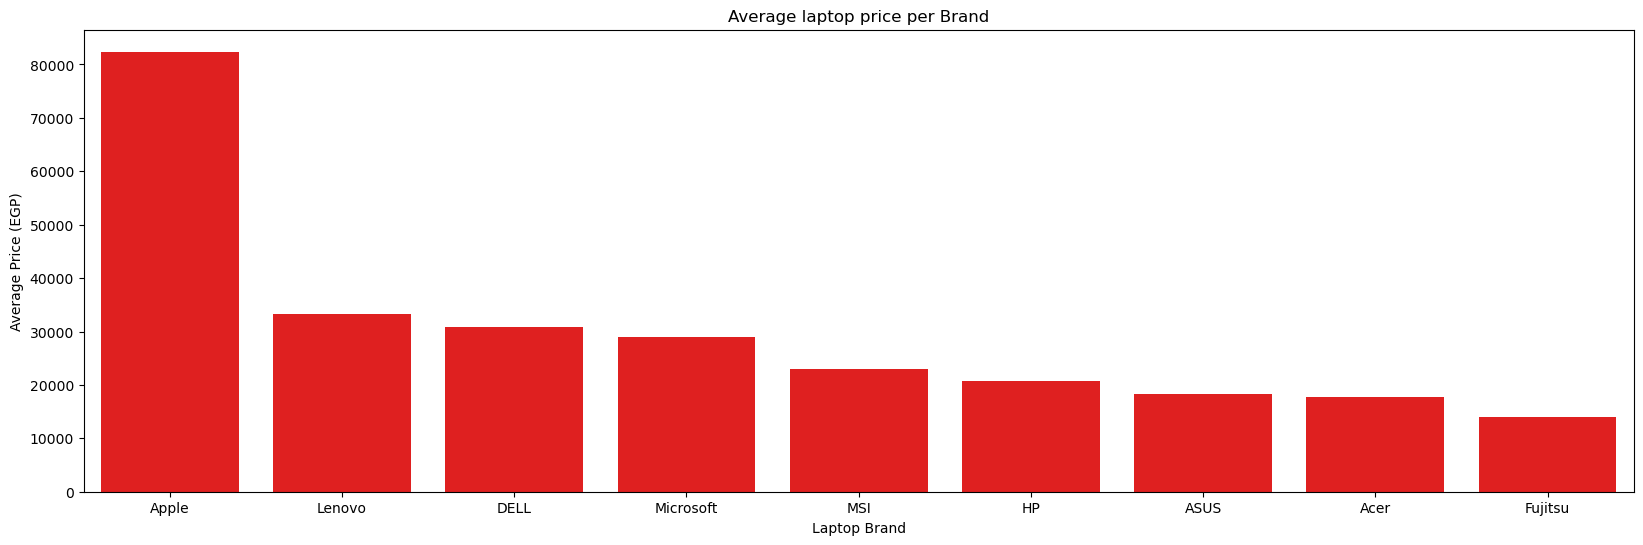

In [46]:
price_brand = merged_data.groupby('brand')['Price(EGP)'].mean().sort_values(ascending = False)

# Plot the average price vs brand
plt.figure(figsize=(20, 6))
plt.title("Average laptop price per Brand")
sns.barplot(x=price_brand.index, y=price_brand.values, color='red')
plt.xlabel('Laptop Brand')
plt.ylabel('Average Price (EGP)')
plt.savefig('1.png', bbox_inches='tight')
plt.show()



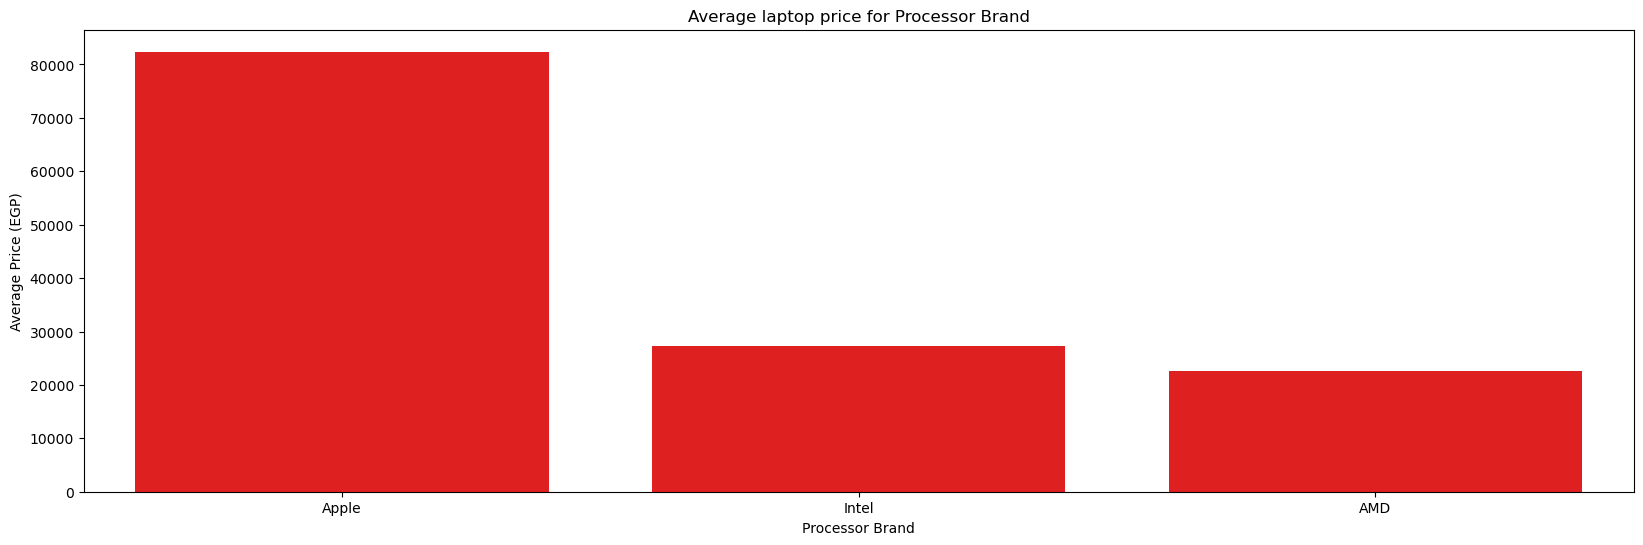

In [47]:
price_CpuBrand = merged_data.groupby('Processor Brand')['Price(EGP)'].mean().sort_values(ascending = False)

# Plot the average price vs brand
plt.figure(figsize=(20, 6))
plt.title("Average laptop price for Processor Brand")
sns.barplot(x=price_CpuBrand.index, y=price_CpuBrand.values, color='red')
plt.xlabel('Processor Brand')
plt.ylabel('Average Price (EGP)')
plt.savefig('1.png', bbox_inches='tight')
plt.show()



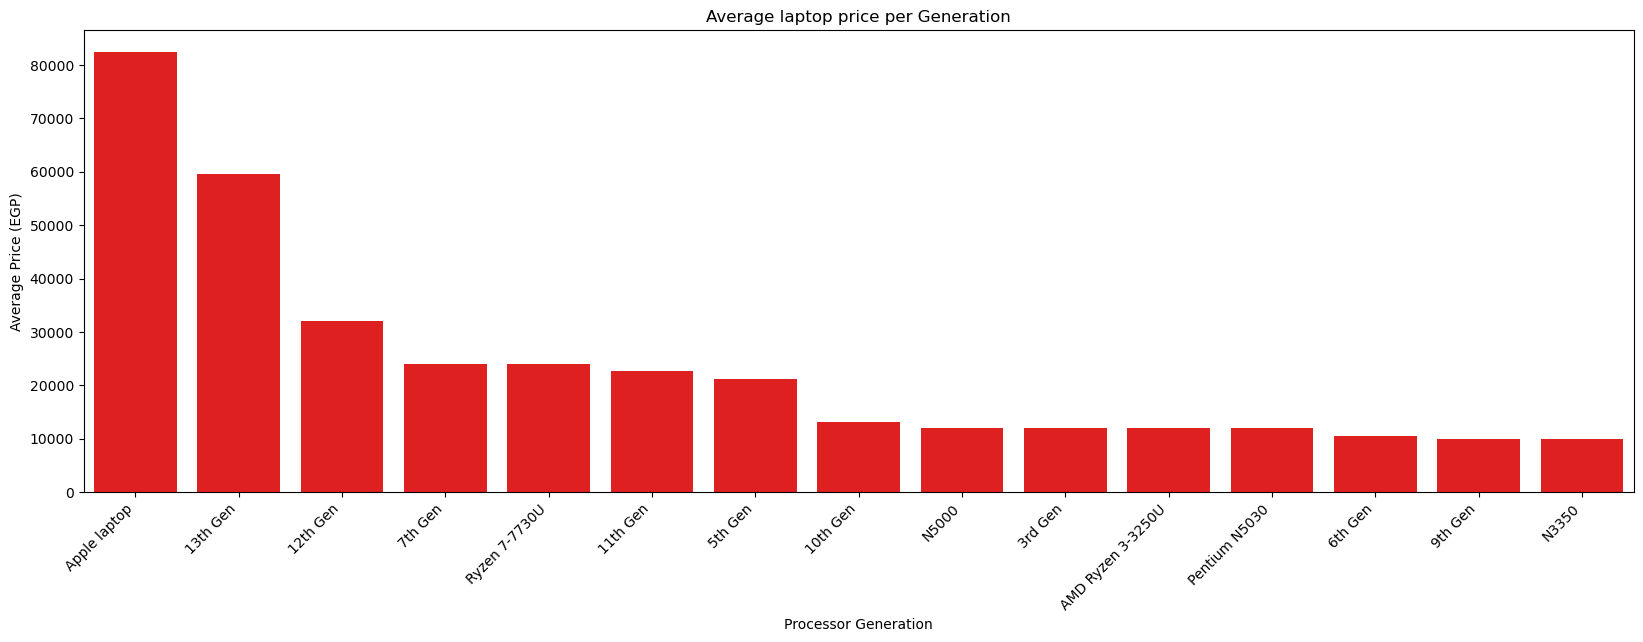

In [48]:

price_gen = merged_data.groupby('Processor Version Number/Generation')['Price(EGP)'].mean().sort_values(ascending = False)

# Plot the average price vs brand
plt.figure(figsize=(20, 6))
plt.title("Average laptop price per Generation")
sns.barplot(x=price_gen.index, y=price_gen.values, color='red')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Processor Generation')
plt.ylabel('Average Price (EGP)')
plt.savefig('1.png', bbox_inches='tight')
plt.show()



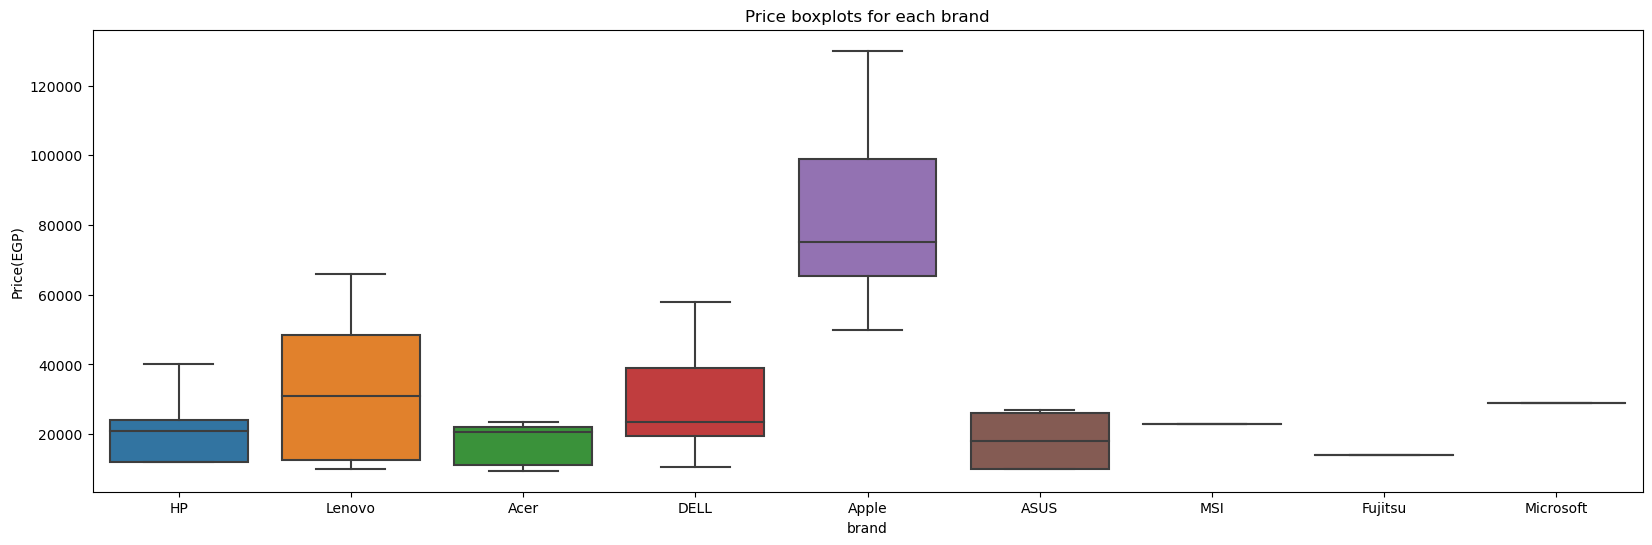

In [49]:
plt.figure(figsize=(20, 6))

sns.boxplot(x="brand", y="Price(EGP)", data=merged_data)
plt.title("Price boxplots for each brand")
plt.savefig('1.png', bbox_inches='tight')

plt.show()

In [50]:
merged_data.columns

Index(['brand', 'Price(EGP)', 'Operating System Version',
       'Display Resolution Type', 'Processor Speed(GHZ)', 'Operating System',
       'RAM Size(GB)', 'Storage Type', 'Internal Memory', 'Screen Size(inch)',
       'Display Resolution', 'Colour Name', 'Processor Type', 'Laptop Type',
       'Processor Version Number/Generation', 'Number of Cores', 'RAM Type',
       'Processor Brand', 'External Graphics', 'HDMI Output',
       'Number of USB Ports', 'SD Card Slot', 'Number of HDMI Ports',
       'Processor Version'],
      dtype='object')

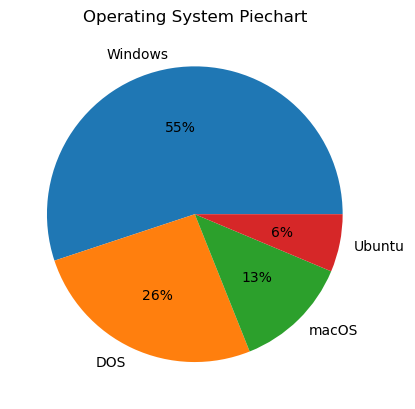

In [51]:

data = merged_data['Operating System'].value_counts().values
keys = merged_data['Operating System'].value_counts().index

# plotting data on chart
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.title('Operating System Piechart')
plt.savefig('1.png', bbox_inches='tight')

# displaying chart
plt.show()

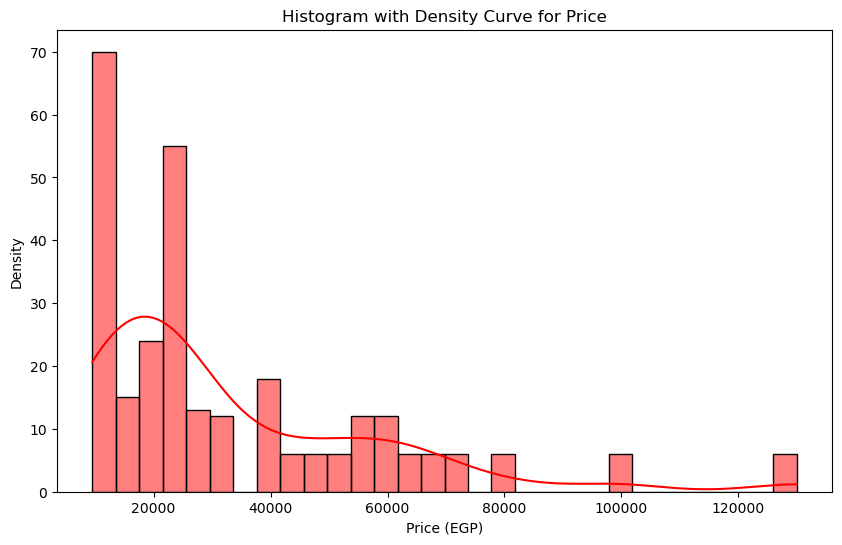

In [52]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.histplot(data=merged_data, x='Price(EGP)', bins=30, kde=True, color='red')

# Add labels and title
plt.xlabel('Price (EGP)')
plt.ylabel('Density')
plt.title('Histogram with Density Curve for Price')
plt.savefig('1.png', bbox_inches='tight')

plt.show()


In [53]:
merged_data.head(6)

,brand,Price(EGP),Operating System Version,Display Resolution Type,Processor Speed(GHZ),Operating System,RAM Size(GB),Storage Type,Internal Memory,Screen Size(inch),Display Resolution,Colour Name,Processor Type,Laptop Type,Processor Version Number/Generation,Number of Cores,RAM Type,Processor Brand,External Graphics,HDMI Output,Number of USB Ports,SD Card Slot,Number of HDMI Ports,Processor Version
0,HP,19999,Windows 11 Home,Full HD,4.5,Windows,8,SSD,512 GB,15.6,1080x1920,Silver,Core i5,Notebook,11th Gen,Quad Core,DDR4,Intel,Integrated,Yes,3,No,1.0,Core i5-1155G7
1,HP,11999,Windows 11,HD,2.6,Windows,4,SSD,256 GB,15.6,1366x768,Black,Ryzen 3,Notebook,3rd Gen,Octa Core,DDR4,AMD,Graphic Card,Yes,3,Yes,1.0,Ryzen 3 3250U
2,Lenovo,45600,Windows 11,Full HD,2.3,Windows,16,SSD,512 GB,15.6,1920x1080,Grey,Core i7,Notebook,12th Gen,10-Core,DDR4,Intel,Graphic Card,Yes,3,No,1.0,i7-12650H
3,HP,23999,Windows 11 Home,Full HD,4.5,Windows,16,SSD,512 GB,15.6,1080x1920,Silver,Ryzen 7,Notebook,7th Gen,Octa Core,DDR4,AMD,Integrated,Yes,3,No,1.0,Ryzen 7 7730U
4,HP,24999,Windows 11,Full HD,3.5,Windows,8,SSD,512 GB,15.6,1920x1080,Silver,Core i7,Notebook,12th Gen,Deca core,SDRAM,Intel,Integrated,Yes,3,Yes,1.0,Core i7-1255u
5,Acer,9499,Free DOS,Full HD,1.2,DOS,4,HDD,1 TB,15.6,1080x1920,Shale Black,Intel Core i3,Notebook,10th Gen,Dual Core,DDR4,Intel,Integrated,Yes,3,No,1.0,Core i5-1035G1


In [54]:
merged_data['Internal Memory'].value_counts()

Internal Memory
512 GB    145
256 GB     80
1 TB       42
500 GB     12
128 GB      6
Name: count, dtype: int64

In [55]:
# Creating a contingency table for three categorical variables: Department, Gender, and EducationField
contingency_table = pd.crosstab(merged_data['Internal Memory'] , merged_data['brand'])

contingency_table.head()

brand,ASUS,Acer,Apple,DELL,Fujitsu,HP,Lenovo,MSI,Microsoft
Internal Memory,,,,,,,,,
1 TB,6,18,0,6,0,6,6,0,0
128 GB,0,0,0,0,0,6,0,0,0
256 GB,0,6,24,12,1,12,24,0,1
500 GB,6,0,0,6,0,0,0,0,0
512 GB,12,6,12,30,0,36,48,1,0


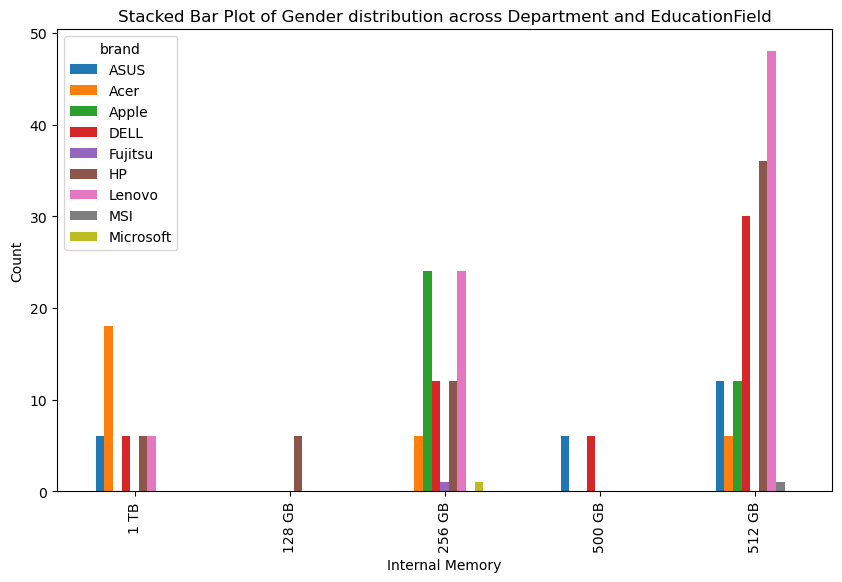

In [56]:
# Creating a Stacked Bar Plot to visualize the contingency table
contingency_table.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Stacked Bar Plot of Gender distribution across Department and EducationField')
plt.ylabel('Count')
plt.show()

In [58]:
# export The DF to csv file 

merged_data.to_csv('D:/feps  fourth year curriculum/Social DS/labtop data/clean_data.csv', index=False)
